# ACCY577 Final Project

## Overview

In this project, you will finish the first three steps in the data analytics framework CRISP-DM, business understanding, data understanding and data preparation on the LendingClub dataset.

We provide a template of the project report, which consists of many mini tasks. Every mini task is worth certain points and the total is 100 points.

All the plots should be properly labeld and titled.

This is an individual project. Please work on it by yourself only.


## Table of Contents


[**Business Understanding**](#Business-Understanding)

[**Data Understanding and Data Preparation**](#Data-Understanding-and-Data-Preparation)

- [**Data File**](#Data-File)
   - [**Task 1: Load Data Dictionary**](#Task-1:-Load-Data-Dictionary)
   - [**Task 2: Load Data File**](#Task-2:-Load-Data-File)
- [**Check Data Quality**](#Check-Data-Quality)
   - [**Task 3: Basic Dataframe Info**](#Task-3:-Basic-Dataframe-Info)
   - [**Task 4: Clean Up Currency Column**](#Task-4:-Clean-Up-Currency-Column)
   - [**Task 5: Statistics of Numeric Columns**](#Task-5:-Statistics-of-Numeric-Columns)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
   - [**Task 6: Loan Grade**](#Task-6:-Loan-Grade)
   - [**Task 7: Distribution of Interest Rate**](#Task-7:-Distribution-of-Interest-Rate)
   - [**Task 8: Loan Grade and Interest Rate**](#Task-8:-Loan-Grade-and-Interest-Rate)
   - [**Task 9: Loan Term and Interest Rate**](#Task-9:-Loan-Term-and-Interest-Rate)
   - [**Task 10: Loan by State**](#Task-10:-Loan-by-State)
   - [**Task 11: Borrowers Annual Income Distribution**](#Task-11:-Borrowers-Annual-Income-Distribution)
   - [**Task 12: Borrower Annual Income by State**](#Task-12:-Borrower-Annual-Income-by-State)
   - [**Task 13: Annual Income and Interest Rate**](#Task-13:-Annual-Income-and-Interest-Rate)
   - [**Task 14: Convert Date Column**](#Task-14:-Convert-Date-Column)
   - [**Task 15: Loan Issued Over Year**](#Task-15:-Loan-Issued-Over-Year)
   - [**Task 16: Interest Rate Change**](#Task-16:-Interest-Rate-Change)
   - [**Task 17: Loan Status**](#Task-17:-Loan-Status)
   - [**Task 18: Loan Term and Loan Status**](#Task-18:-Loan-Term-and-Loan-Status)
   - [**Task 19: Loan Return**](#Task-19:-Loan-Return)
   - [**Task 20: Choose Loan to Invest**](#Task-20:-Choose-Loan-to-Invest)


[Back to Top](#Table-of-Contents)

## Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.

### Lending Club

LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. It is the world's largest peer-to-peer lending platform.

LendingClub enables borrowers to create unsecured personal loans between \\$1,000 and \\$40,000. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.

For more information about the company please check out the wikipedia article about the [LendingClub](https://en.wikipedia.org/wiki/LendingClub).


### Objective

In this project, we will explore the loan and the borrower information, loan payoff rate and loan returns.


[Back to Top](#Table-of-Contents)

## Data Understanding and Data Preparation
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information.

Data understanding is always done together with data preparation, which cleans up data, deals with missing values and creates new features through feature engineering.

### Data File

The data file **lending_club_2007_2011_6_states.csv** contains the loan and borrower information for loans initiated from 2007 to 2011 in six states, California, New York, Florida, Texas, New Jersy and Illinois.

The data dictionary file **data_dictionary.csv** contains descriptions of all the columns in the data file.

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#display all dataframe columns in df.head()
pd.options.display.max_columns = None
#display long string in datafame
pd.options.display.max_colwidth = 300

#filter out warning messages
import warnings
warnings.filterwarnings('ignore')


### Task 1: Load Data Dictionary
In the next code cell, please load the data dictionary to a DataFrame and display the **whole** DataFrame.

#### Your Code

In [3]:
pd.read_csv('data_dictionary.csv')

,ColumnName,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,addr_state,The state provided by the borrower in the loan application
2,annual_inc,The self-reported annual income provided by the borrower during registration.
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,chargeoff_within_12_mths,Number of charge-offs within 12 months
5,collection_recovery_fee,post charge off collection fee
6,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
7,debt_settlement_flag,"Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company."
8,debt_settlement_flag_date,The most recent date that the Debt_Settlement_Flag has been set
9,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


### Task 2: Load Data File

Load lending_club_2007_2011_6_states.csv to a DataFrame **loan_df** and display the first 5 rows.

#### Your Code

In [4]:
loan_df = pd.read_csv('lending_club_2007_2011_6_states.csv')
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,"$12,252",Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jun-2017,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"$49,200",Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,"$48,000",Source Verified,Dec-2011,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221,87.5,4.0,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,"$40,000",Source Verified,Dec-2011,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-2012,152.39,NaN,Oct-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,"$15,000",Verified,Dec-2011,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279,36.5,3.0,f,0.0,0.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-2012,121.45,NaN,Dec-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


In [5]:
loan_df[loan_df.loan_amnt>loan_df.funded_amnt].shape

(974, 58)

### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


### Task 3: Basic Dataframe Info

Discuss the basic information of the data briefly. 

You can use `info()` function to print basic DataFrame information. You may also use `df.isnull().sum()` to check out count of null values in each column.

Please write your code in the code cell and your discussion in the markdown cell. The discussion can be very brief with just a few sentences.

You may add extra code cells if needed.

#### Your Code

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 58 columns):
loan_amnt                      19908 non-null int64
funded_amnt                    19908 non-null int64
funded_amnt_inv                19908 non-null float64
term                           19908 non-null object
int_rate                       19908 non-null float64
installment                    19908 non-null float64
grade                          19908 non-null object
sub_grade                      19908 non-null object
emp_title                      18723 non-null object
emp_length                     19409 non-null object
home_ownership                 19908 non-null object
annual_inc                     19908 non-null object
verification_status            19908 non-null object
issue_d                        19908 non-null object
loan_status                    19908 non-null object
pymnt_plan                     19908 non-null object
purpose                        19908 non-n

In [7]:
loan_df.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       1185
emp_length                       499
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                              5
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq         12910
mths_since_last_record         18699
open_acc                           0
p

#### Your Discussion

The data has 58 columns and 21173 rows.
5 columns mostly have missing values.

### Task 4: Clean Up Currency Column

Strip "$" and "," from annual_inc, convert datatype to float.

#### Your Code

In [8]:
loan_df.annual_inc = loan_df.annual_inc.str.replace('$','').str.replace(',','').astype(float)
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jun-2017,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-2011,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221,87.5,4.0,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-2011,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-2012,152.39,NaN,Oct-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-2011,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279,36.5,3.0,f,0.0,0.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-2012,121.45,NaN,Dec-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


### Task 5: Statistics of Numeric Columns

Print out the descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution.(Hint: describe())

Discuss following columns briefly
- loan_amnt
- funded_amnt
- int_rate
- annual_inc

#### Your Code

In [9]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,1.990800e+04,19908.000000,19908.000000,19908.000000,6998.000000,1209.000000,19908.000000,19908.000000,19908.000000,19889.000000,19908.000000,19908.0,19908.0,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,0.0,19893.0,0.0,19908.0,19908.0,19893.0,19908.0,19595.000000,19898.0
mean,11353.846444,11065.763763,10500.929748,12.089717,330.614254,7.107345e+04,13.008619,0.143962,0.829466,35.841097,69.354839,9.278782,0.046715,13363.994826,49.424966,21.527627,0.0,0.0,12286.852391,11690.155107,9913.519990,2277.120129,1.489973,94.722382,11.861625,2636.253711,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.037969,0.0
std,7463.700492,7176.276661,7106.229650,3.698287,210.557434,6.980565e+04,6.663658,0.489576,1.044978,21.599170,44.520279,4.414903,0.217827,15943.303849,28.198395,11.269006,0.0,0.0,9098.847567,8984.722396,7126.424699,2583.733214,7.964257,666.434583,141.910324,4412.964304,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.191393,0.0
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5750.000000,5600.000000,5000.000000,9.450000,171.287500,4.200000e+04,7.840000,0.000000,0.000000,19.000000,0.000000,6.000000,0.000000,3770.500000,26.500000,13.000000,0.0,0.0,5670.592545,5239.857500,4800.000000,687.595000,0.000000,0.000000,0.000000,222.530000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,10000.000000,9000.000000,11.860000,285.780000,6.000000e+04,13.075000,0.000000,0.000000,34.000000,90.000000,9.000000,0.000000,8876.500000,50.300000,20.000000,0.0,0.0,10042.735817,9427.845000,8000.000000,1389.230000,0.000000,0.000000,0.000000,544.700000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14500.000000,14.610000,440.815000,8.500000e+04,18.200000,0.000000,1.000000,51.000000,104.000000,12.000000,0.000000,16952.250000,72.800000,28.000000,0.0,0.0,16681.688450,15983.440000,14000.000000,2842.795000,0.000000,0.000000,0.000000,3193.352500,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,24.400000,1302.690000,6.000000e+06,29.990000,11.000000,8.000000,106.000000,129.000000,44.000000,3.000000,148829.000000,99.900000,90.000000,0.0,0.0,58480.139915,58438.370000,35000.020000,23480.140000,180.200000,29623.350000,6543.040000,35596.410000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,2.000000,0.0


#### Your Discussion



- loan_amnt is from 500 to 35000
- funded_amnt is from 500 to 35000
- int_rate is from 5.42% to 24.4%, with median at 12%
- median annual income is 60000

### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visualizations.

### Task 6: Loan Grade
How many different loan grade there are in the dataset?

- Plot a bar chart for grade. X axis is the loan grade and y axis is the count of loans. The plot should have x and y axis label and a proper title.
- Discuss the result briefly

Hint: You may use seaborn countplot. To sort the loan grade you may set `order=sorted(loan_df.grade.unique())` in the countplot.

#### Your Code

In [10]:
loan_df.grade.value_counts().sort_index()

A    4875
B    6065
C    4087
D    2748
E    1434
F     540
G     159
Name: grade, dtype: int64

Text(0.5, 1.0, 'Loan Grade')

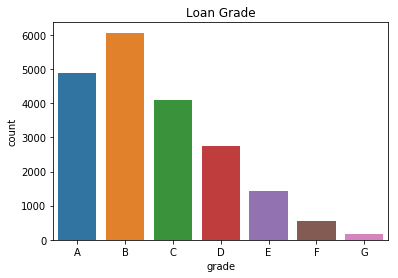

In [11]:
ax = sns.countplot('grade',data=loan_df, order=sorted(loan_df.grade.unique()))
ax.set_title('Loan Grade')


#### Your Discussion

Majority loans have grade D or better.

### Task 7: Distribution of Interest Rate

- Plot a histogram on int_rate. The plot should have proper labels and title.

- Discuss the distribution of the interest rate briefly.

#### Your Code

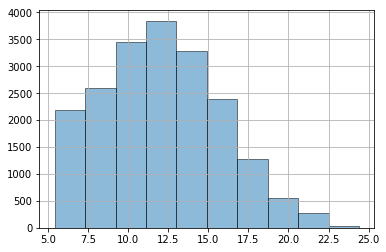

In [12]:
loan_df.int_rate.hist(edgecolor='black', alpha=0.5)

#### Your Discussion

Most loans have interest rate between 5 to 17 percent.

### Task 8: Loan Grade and Interest Rate

Explore the relationship between loan grade and interest rate.

- Get average interest rate for each loan grade. (Hint: groupby)
- Visualize the relationship. You can use any feasible plot. Make sure the plot has proper labels and title.
- Discuss the relationship briefly


#### Your Code

Text(0.5, 1.0, 'Loan Grade and Interest Rate')

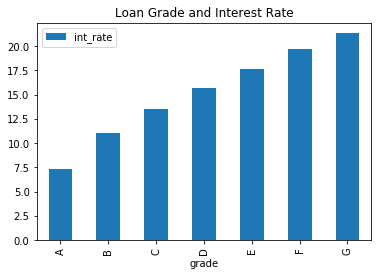

In [13]:
ax = loan_df.groupby('grade').agg({'int_rate':'mean'}).plot.bar()
ax.set_title('Loan Grade and Interest Rate')

#### Your Discussion

The higher the loan grade, the lower the interest rate.

### Task 9: Loan Term and Interest Rate

Explore the relationship between loan term and interest rate.

- Get average interest rate for each loan term. (Hint: groupby)
- Visualize the relationship. You can use any feasible plot. Make sure the plot has proper labels and title.
- Discuss the relationship briefly


#### Your Code

Text(0.5, 1.0, 'Loan Grade and Interest Rate')

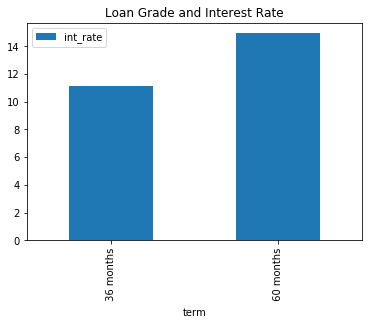

In [14]:
ax = loan_df.groupby('term').agg({'int_rate':'mean'}).plot.bar()
ax.set_title('Loan Grade and Interest Rate')

#### Your Discussion

Lonas with shorter have lowever interest rate.

### Task 10: Loan by State

There are 6 State's loan in the dataset. Please explore the count of loans in each state via visualization.

- Visualize loan counts in each State. Make sure the plot has proper labels and title. (Hint: if you use countplot you may sort the bars with `order=loan_df.addr_state.value_counts().index`)
- Discuss the result briefly


#### Your Code

Text(0.5, 1.0, 'Loan by State')

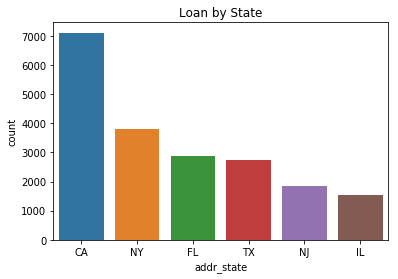

In [15]:
ax = sns.countplot('addr_state',data=loan_df, order=loan_df.addr_state.value_counts().index)
ax.set_title('Loan by State')

#### Your Discussion

CA has most loan initiated, IL has the least.

### Task 11: Borrowers Annual Income Distribution

- Plot a histogram of all borrower's annual income.
- Plot another histogram of annual income that is less than $250,000
- Compare the plots and discuss briefly.

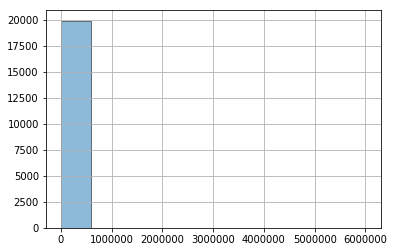

In [16]:
loan_df.annual_inc.hist(edgecolor='black', alpha=0.5)

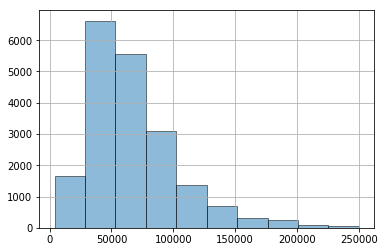

In [17]:
loan_df[loan_df.annual_inc<250000].annual_inc.hist(edgecolor='black', alpha=0.5)

#### Your Discussion

Majority borrowers have annual income less than $200,000. There are some outliers with income close to $6mil. There's only one bar in the first histogram due to the small number of borrowers with income greater than $500,000.

### Task 12: Borrower Annual Income by State

- Viusalize **median** income of borrowers from each state.
- Discuss the result briefly

#### Your Code

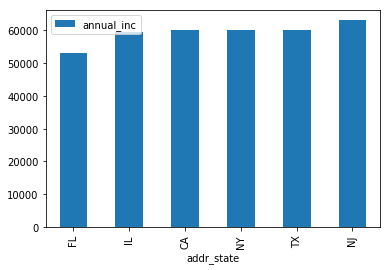

In [18]:
loan_df.groupby('addr_state').agg({'annual_inc':'median'}).sort_values(by='annual_inc').plot.bar()

#### Your Discussion

Florida borrower has lowest median income. Borrowers from other states have similar median income.

### Task 13: Annual Income and Interest Rate

- Plot a scatter plot on annual income and interest rate
- Discuss the result briefly

#### Your Code

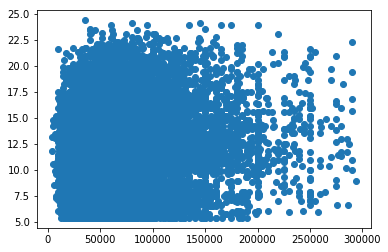

In [19]:
df = loan_df[(loan_df.annual_inc<300000)]
fig, ax = plt.subplots()

# Plot the length features and the width features
ax.scatter(df.annual_inc, df.int_rate)


#### Your Discussion

No apparent correlation between income and interest rate.

### Task 14: Convert Date Column

- Convert issue_d column to datetime object
- Create issue_year column to be the year a loan is issued

#### Your Code

In [20]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d)
loan_df['issue_year'] = loan_df.issue_d.dt.year
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jun-2017,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221,87.5,4.0,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-2012,152.39,NaN,Oct-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279,36.5,3.0,f,0.0,0.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-2012,121.45,NaN,Dec-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011


### Task 15: Loan Issued Over Year

Explore the number of loan issued through LendingClub from 2007-2011. 
- Get count of loans in each year(Hint: groupby issue_year)
- Plot a line chart to see the trend, x axis is year
- Discuss the result briefly.

#### Your Code

In [21]:
loan_df.groupby('issue_year').agg({'int_rate':'count'})

,int_rate
issue_year,
2007,90
2008,780
2009,2363
2010,5861
2011,10814


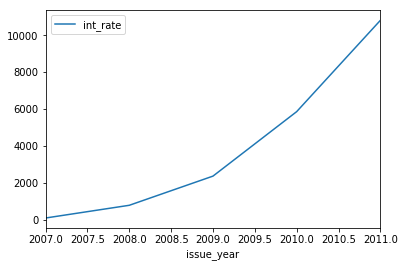

In [22]:
loan_df.groupby('issue_year').agg({'int_rate':'count'}).plot.line()

#### Your Discussion

LendingClub expanded fast from 2007 to 2011.

### Task 16: Interest Rate Change

Explore the interest rate change in each state over years.

- Create pivot table, set
  - index to issue_year
  - columns to addr_state
  - values to int_rate
  - aggfunc to median
- Plot a line chart to compare median interest rate change over years of the 6 states.
- Discuss the result briefly

#### Your Code

In [23]:
loan_df.pivot_table(index='issue_year', columns='addr_state', values='int_rate', aggfunc='median').round(2)

addr_state,CA,FL,IL,NJ,NY,TX
issue_year,,,,,,
2007,9.64,10.43,8.54,10.28,10.75,8.22
2008,11.34,10.96,11.14,11.31,11.31,11.00
2009,12.21,12.21,12.18,12.53,12.53,12.84
2010,11.86,11.36,11.49,12.23,11.86,11.49
2011,11.99,11.71,11.99,12.42,11.99,11.71


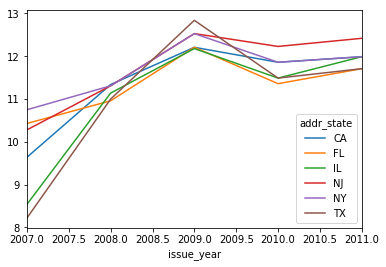

In [24]:
loan_df.pivot_table(index='issue_year', columns='addr_state', values='int_rate', aggfunc='median').round(2).plot.line()

#### Your Discussion

The interest rate spread was big in the first 2 years due to small number of loans. It converged after two years. The interest rate peaked in 2009.

### Task 17: Loan Status

The loans in the dataset were issued before 2011 and the longest loan term is 5 years. So all the loans are either paid off or charged off.

Discuss loan status and its relationship with loan/borrower information.

- Create pivot table, set
  - index to issue_year
  - columns to loan_status
  - values to int_rate
  - aggfunc to count
- Calculate the paid off rate for loans issued in each year
- Discuss the result briefly

#### Your Code

In [25]:
paidoff_df = loan_df.pivot_table(index='issue_year', columns='loan_status', values='int_rate', aggfunc='count')
paidoff_df['payoff_rate'] = paidoff_df['Fully Paid']/(paidoff_df['Fully Paid']+paidoff_df['Charged Off'])
paidoff_df

loan_status,Charged Off,Fully Paid,payoff_rate
issue_year,,,
2007,25,65,0.722222
2008,139,641,0.821795
2009,308,2055,0.869657
2010,773,5088,0.868111
2011,1698,9116,0.842981


In [26]:
loan_df.groupby('loan_status').agg({'int_rate':'median'})

,int_rate
loan_status,
Charged Off,13.49
Fully Paid,11.71


In [27]:
loan_df.groupby('loan_status').agg({'annual_inc':'median'})

,annual_inc
loan_status,
Charged Off,54000.0
Fully Paid,60000.0


#### Your Discussion

About 85% of loans are paid off.

Charged off loans have higher interest rate.

Borrowers of charged off lonas have lower annual income than borrowers of paid off loans.

36 month loans have higher paid off rate.

### Task 18: Loan Term and Loan Status

Explore paid off rate of 3 and 5 year loans.

- Create pivot table, set
  - index to term
  - columns to loan_status
  - values to int_rate(or any column)
  - aggfunc to count
- Calculate the paid off rate for loans of different terms
- Discuss the result briefly

#### Your Code

In [28]:
tl_df = loan_df.pivot_table(index='term', columns='loan_status', values='int_rate', aggfunc='count')
tl_df['Paidoff_rate'] = tl_df['Fully Paid']/(tl_df['Charged Off']+tl_df['Fully Paid'])
tl_df

loan_status,Charged Off,Fully Paid,Paidoff_rate
term,,,
36 months,1728,13124,0.883652
60 months,1215,3841,0.759691


#### Your Discussion

36 month loan has higher paidoff rate.

### Task 19: Loan Return

Calculate the overall return of 3 year and 5 year loans.

- Strip extra white space in term column, ie. convert ' 36 months' to '36 months'
- Get total payment that includes recoveries of charged off loans for a given term
- Use total payment and Total funded amount to get overall return.
- Calculate annualized return with formula $annualized return = (1+total return)^{(1/years)} - 1$. For example, if overall return of all 36 is 10%, then annualized return = `(1 + 0.1)**(1/3) - 1`
- Discuss the result briefly

#### Your Code

In [29]:
loan_df.term = loan_df.term.str.strip()
df_36 = loan_df[loan_df.term=="36 months"]
return_36 = (df_36.total_pymnt.sum() + df_36.recoveries.sum())/df_36.funded_amnt.sum()-1
annual_return_36 = (1+return_36)**(1/3)-1
annual_return_36

0.03028789309763802

In [30]:
df_60 = loan_df[loan_df.term=="60 months"]
return_60 = (df_60.total_pymnt.sum() + df_60.recoveries.sum())/df_60.funded_amnt.sum()-1
return_60
annual_return_60 = (1+return_60)**(1/5)-1
annual_return_60

0.031295585034884166

#### Your Discussion

### Task 20: Choose Loan to Invest

Assume you are an investor, what kind of loans you should invest? You may disucss the relationship between loan return and loan/borrower information. At least 2 loan/borrower features should be discussed.

#### Your Code

In [31]:
loan_df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year
6288,5750,5750,5750.0,60 months,12.99,130.81,C,C1,home depot,10+ years,RENT,29120.0,Verified,2011-06-01,Charged Off,n,home_improvement,new home,331xx,FL,16.11,0.0,Dec-1998,3.0,NaN,NaN,5.0,0.0,11047,43.2,11.0,f,0.0,0.0,2228.94,2228.94,1101.46,845.24,0.0,282.24,2.44,Oct-2012,130.81,NaN,Oct-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011


In [32]:
grade_pt = loan_df.pivot_table(index='grade', columns='term', values=['funded_amnt', 'total_pymnt', 'recoveries'], aggfunc='sum')
grade_pt

funded_amnt               recoveries                  total_pymnt  \
term    36 months 60 months      36 months      60 months     36 months   
grade                                                                     
A        40223300   1610825   80041.923437    5570.470000  4.301777e+07   
B        48425500  17944175  192026.510000  160393.610000  5.272772e+07   
C        28007450  15923300  229044.836183  182748.068126  3.081123e+07   
D        19302825  14252650  158357.844061  220569.660000  2.146649e+07   
E         5892275  16088000   58527.645626  306792.770000  6.469314e+06   
F         1559025   7808650   24021.980000  187861.870000  1.602366e+06   
G          580775   2678475   21452.270000   58323.720000  6.166232e+05   

                     
term      60 months  
grade                
A      1.812681e+06  
B      2.015754e+07  
C      1.818043e+07  
D      1.658533e+07  
E      1.891013e+07  
F      9.159363e+06  
G      3.089674e+06

In [33]:
grade_pt.columns

MultiIndex([('funded_amnt', '36 months'),
            ('funded_amnt', '60 months'),
            ( 'recoveries', '36 months'),
            ( 'recoveries', '60 months'),
            ('total_pymnt', '36 months'),
            ('total_pymnt', '60 months')],
           names=[None, 'term'])

In [34]:
grade_pt['return_36'] = (grade_pt[('total_pymnt', '36 months')] + grade_pt[('recoveries', '36 months')])/grade_pt[('funded_amnt', '36 months')]-1
grade_pt['return_60'] = (grade_pt[('total_pymnt', '60 months')] + grade_pt[('recoveries', '60 months')])/grade_pt[('funded_amnt', '60 months')]-1
grade_pt

funded_amnt               recoveries                  total_pymnt  \
term    36 months 60 months      36 months      60 months     36 months   
grade                                                                     
A        40223300   1610825   80041.923437    5570.470000  4.301777e+07   
B        48425500  17944175  192026.510000  160393.610000  5.272772e+07   
C        28007450  15923300  229044.836183  182748.068126  3.081123e+07   
D        19302825  14252650  158357.844061  220569.660000  2.146649e+07   
E         5892275  16088000   58527.645626  306792.770000  6.469314e+06   
F         1559025   7808650   24021.980000  187861.870000  1.602366e+06   
G          580775   2678475   21452.270000   58323.720000  6.166232e+05   

                    return_36 return_60  
term      60 months                      
grade                                    
A      1.812681e+06  0.071464  0.128770  
B      2.015754e+07  0.092807  0.132286  
C      1.818043e+07  0.108286  0.153227  
D      1.658533e+07  0.120294  0.179142  
E      1.891013e+07  0.107864  0.194488  
F      9.159363e+06  0.043208  0.197035  
G      3.089674e+06  0.098662  0.175295

In [35]:
state_pt = loan_df.pivot_table(index='addr_state', columns='term', values=['funded_amnt', 'total_pymnt', 'recoveries'], aggfunc='sum')
state_pt

funded_amnt               recoveries                  total_pymnt  \
term         36 months 60 months      36 months      60 months     36 months   
addr_state                                                                     
CA            52558625  25905400  279694.710000  402399.370000  5.674722e+07   
FL            19200775  10884575   98768.879620  177444.530000  2.046314e+07   
IL            11109100   6007925   28434.765626   94294.240000  1.225648e+07   
NJ            13231900   8151550   89136.634061  101402.250000  1.443963e+07   
NY            27694375  14360625  155634.440000  224544.708126  3.052278e+07   
TX            20196375  10996000  111803.580000  122175.070000  2.228227e+07   

                          
term           60 months  
addr_state                
CA          2.930614e+07  
FL          1.218895e+07  
IL          7.074837e+06  
NJ          9.465018e+06  
NY          1.677428e+07  
TX          1.308591e+07

In [36]:
state_pt['return_36'] = (state_pt[('total_pymnt', '36 months')] + state_pt[('recoveries', '36 months')])/state_pt[('funded_amnt', '36 months')]-1
state_pt['return_60'] = (state_pt[('total_pymnt', '60 months')] + state_pt[('recoveries', '60 months')])/state_pt[('funded_amnt', '60 months')]-1
state_pt

funded_amnt               recoveries                  total_pymnt  \
term         36 months 60 months      36 months      60 months     36 months   
addr_state                                                                     
CA            52558625  25905400  279694.710000  402399.370000  5.674722e+07   
FL            19200775  10884575   98768.879620  177444.530000  2.046314e+07   
IL            11109100   6007925   28434.765626   94294.240000  1.225648e+07   
NJ            13231900   8151550   89136.634061  101402.250000  1.443963e+07   
NY            27694375  14360625  155634.440000  224544.708126  3.052278e+07   
TX            20196375  10996000  111803.580000  122175.070000  2.228227e+07   

                         return_36 return_60  
term           60 months                      
addr_state                                    
CA          2.930614e+07  0.085015  0.146809  
FL          1.218895e+07  0.070890  0.136140  
IL          7.074837e+06  0.105842  0.193279  
NJ          9.465018e+06  0.098010  0.173571  
NY          1.677428e+07  0.107749  0.183711  
TX          1.308591e+07  0.108816  0.201172

#### Your Discussion

- For 5 year loans, lower grade loans have better return
- For 3 year loans, loans with grade CDE have better reutrn than both safe and risky loans
- Texas loans are most profitable, both 3 and 5 year loans. Avoid Florida.

# 577 start

In [37]:
loan_df.loan_status.value_counts()

Fully Paid     16965
Charged Off     2943
Name: loan_status, dtype: int64

### Encode loan_status

In [38]:
mapping_dict = {'Charged Off':0, 'Fully Paid':1}
#Encode Size column
loan_df['repaid'] = loan_df.loan_status.map(mapping_dict)

loan_df.repaid.value_counts()

1    16965
0     2943
Name: repaid, dtype: int64

In [39]:
pd.read_csv('data_dictionary.csv')

,ColumnName,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,addr_state,The state provided by the borrower in the loan application
2,annual_inc,The self-reported annual income provided by the borrower during registration.
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,chargeoff_within_12_mths,Number of charge-offs within 12 months
5,collection_recovery_fee,post charge off collection fee
6,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
7,debt_settlement_flag,"Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company."
8,debt_settlement_flag_date,The most recent date that the Debt_Settlement_Flag has been set
9,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


In [40]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 60 columns):
loan_amnt                      19908 non-null int64
funded_amnt                    19908 non-null int64
funded_amnt_inv                19908 non-null float64
term                           19908 non-null object
int_rate                       19908 non-null float64
installment                    19908 non-null float64
grade                          19908 non-null object
sub_grade                      19908 non-null object
emp_title                      18723 non-null object
emp_length                     19409 non-null object
home_ownership                 19908 non-null object
annual_inc                     19908 non-null float64
verification_status            19908 non-null object
issue_d                        19908 non-null datetime64[ns]
loan_status                    19908 non-null object
pymnt_plan                     19908 non-null object
purpose                        19

In [41]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jun-2017,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221,87.5,4.0,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-2015,111.34,NaN,Dec-2014,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-2012,152.39,NaN,Oct-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,0
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279,36.5,3.0,f,0.0,0.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-2012,121.45,NaN,Dec-2016,0.0,NaN,1,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,0


In [42]:
def get_loan_annual_return(df):
    '''
    get 36 and 60 month loan annual reture
    return: annual return of 36 and 60 month loan
    '''
    df.term = df.term.str.strip()
    df_36 = df[df.term=="36 months"]
    return_36 = (df_36.total_pymnt.sum() + df_36.recoveries.sum())/df_36.funded_amnt.sum()-1
    annual_return_36 = (1+return_36)**(1/3)-1
    df_60 = df[df.term=="60 months"]
    return_60 = (df_60.total_pymnt.sum() + df_60.recoveries.sum())/df_60.funded_amnt.sum()-1
    annual_return_60 = (1+return_60)**(1/5)-1
    return annual_return_36, annual_return_60    

In [43]:
len(loan_df.emp_title.unique())

15048

#### emp_title too many different values, can't use

In [44]:
loan_df.emp_length.value_counts()

10+ years    4249
< 1 year     2306
2 years      2218
3 years      2108
4 years      1871
5 years      1649
1 year       1637
6 years      1151
7 years       867
8 years       718
9 years       635
Name: emp_length, dtype: int64

In [45]:
loan_df.groupby(by='emp_length').repaid.mean().sort_values()

emp_length
10+ years    0.837138
5 years      0.843542
6 years      0.845352
8 years      0.848189
7 years      0.850058
1 year       0.852169
4 years      0.857830
< 1 year     0.862966
3 years      0.864326
9 years      0.869291
2 years      0.874211
Name: repaid, dtype: float64

#### shorter emp_length a little higer repaid, keep

In [46]:
loan_df.groupby(by='repaid').revol_bal.mean()

repaid
0    13278.195719
1    13378.878809
Name: revol_bal, dtype: float64

In [47]:
loan_df.groupby(by='repaid').revol_util.mean()

repaid
0    55.496101
1    48.372278
Name: revol_util, dtype: float64

#### Lower revol_util higher repaid, keep

In [48]:
loan_df.groupby(by='repaid').dti.mean()

repaid
0    13.628270
1    12.901125
Name: dti, dtype: float64

#### lower dti higher repaid, not very obvious, consider to keep

In [49]:
loan_df.delinq_2yrs.value_counts()

0.0     17790
1.0      1617
2.0       341
3.0       111
4.0        29
5.0        12
7.0         3
6.0         3
11.0        1
8.0         1
Name: delinq_2yrs, dtype: int64

In [50]:
loan_df.groupby(by='repaid').delinq_2yrs.mean()

repaid
0    0.155963
1    0.141880
Name: delinq_2yrs, dtype: float64

In [51]:
loan_df[loan_df.delinq_2yrs==0].repaid.mean()

0.853513209668353

In [52]:
loan_df[loan_df.delinq_2yrs>0].repaid.mean()

0.8408876298394712

In [186]:
get_loan_annual_return(loan_df[loan_df.delinq_2yrs==0])

(0.02970078561526046, 0.030250880217210785)

In [191]:
get_loan_annual_return(loan_df[loan_df.delinq_2yrs.isin([1,2,3])])

(0.035229669526651186, 0.03997824195952693)

In [192]:
loan_df[loan_df.delinq_2yrs.isin([1,2,3])].term.value_counts()

36 months    1535
60 months     534
Name: term, dtype: int64

In [195]:
loan_df.groupby(by='delinq_2yrs').int_rate.mean()

delinq_2yrs
0.0     11.881026
1.0     13.588182
2.0     14.573372
3.0     14.649910
4.0     16.008276
5.0     14.269167
6.0     12.510000
7.0     16.296667
8.0     18.250000
11.0    10.740000
Name: int_rate, dtype: float64

In [197]:
df.groupby(by='delinq_2yrs').repaid.mean()

delinq_2yrs
0.0     0.853513
1.0     0.840445
2.0     0.844575
3.0     0.846847
4.0     0.793103
5.0     0.916667
6.0     1.000000
7.0     0.666667
8.0     0.000000
11.0    1.000000
Name: repaid, dtype: float64

In [196]:
loan_df[['delinq_2yrs', 'int_rate']].corr()

,delinq_2yrs,int_rate
delinq_2yrs,1.000000,0.157728
int_rate,0.157728,1.000000


#### delinq_2yrs, 0 has higher repaid rate, keep?
delinq_2yrs in [1,2,3] has higher return. It could be that repaid rate don't change much, but interest rate has positive correlation to delinq_2yrs.

In [53]:
loan_df.groupby(by='repaid').annual_inc.mean()

repaid
0    64227.618417
1    72261.024816
Name: annual_inc, dtype: float64

#### higher annual_inc higher repaid, keep

In [54]:
loan_df.hardship_flag.value_counts()

N    19908
Name: hardship_flag, dtype: int64

#### hardship_flag all N, useless

In [55]:
loan_df.home_ownership.value_counts()

RENT        10966
MORTGAGE     7351
OWN          1546
OTHER          44
NONE            1
Name: home_ownership, dtype: int64

In [56]:
loan_df.groupby(by='home_ownership').repaid.mean()

home_ownership
MORTGAGE    0.861379
NONE        1.000000
OTHER       0.818182
OWN         0.841527
RENT        0.847620
Name: repaid, dtype: float64

#### home_ownership MORTGAGE has higher repaid, keep

In [57]:
loan_df.verification_status.value_counts()

Not Verified       8257
Verified           6464
Source Verified    5187
Name: verification_status, dtype: int64

In [58]:
loan_df.groupby(by='verification_status').repaid.mean()

verification_status
Not Verified       0.867991
Source Verified    0.852130
Verified           0.831993
Name: repaid, dtype: float64

#### verification_status not verified has higher repaid, anti intuition but, keep

In [59]:
loan_df.pymnt_plan.value_counts()

n    19908
Name: pymnt_plan, dtype: int64

#### pymnt_plan all n, useless

In [60]:
loan_df.purpose.value_counts()

debt_consolidation    9389
credit_card           2696
other                 2060
home_improvement      1330
major_purchase        1048
small_business         905
car                    687
wedding                539
medical                350
moving                 317
vacation               199
house                  176
educational            161
renewable_energy        51
Name: purpose, dtype: int64

In [61]:
loan_df.groupby(by='purpose').repaid.mean().sort_values()

purpose
small_business        0.728177
educational           0.801242
house                 0.823864
moving                0.829653
other                 0.843689
debt_consolidation    0.845670
medical               0.854286
vacation              0.859296
renewable_energy      0.862745
home_improvement      0.875188
credit_card           0.885757
major_purchase        0.887405
car                   0.892285
wedding               0.894249
Name: repaid, dtype: float64

#### purpose seems a good indicator, avoid small_business, keep

In [62]:
len(loan_df.title.unique())

10539

#### title too many values, useless

In [63]:
loan_df.groupby(by='open_acc').repaid.mean().sort_values()

open_acc
31.0    0.000000
33.0    0.000000
27.0    0.583333
30.0    0.750000
2.0     0.755932
3.0     0.809775
26.0    0.833333
28.0    0.833333
14.0    0.836870
4.0     0.837228
10.0    0.837445
24.0    0.837838
15.0    0.844974
12.0    0.845280
25.0    0.846154
21.0    0.848000
7.0     0.854389
8.0     0.858746
22.0    0.859155
11.0    0.860832
9.0     0.860913
5.0     0.864190
6.0     0.864191
17.0    0.864865
23.0    0.865385
18.0    0.865772
13.0    0.870466
20.0    0.874126
16.0    0.874720
19.0    0.875648
42.0    1.000000
32.0    1.000000
34.0    1.000000
35.0    1.000000
41.0    1.000000
29.0    1.000000
44.0    1.000000
Name: repaid, dtype: float64

In [64]:
loan_df.open_acc.value_counts()

7.0     1971
6.0     1966
8.0     1961
9.0     1819
5.0     1642
10.0    1581
11.0    1394
4.0     1241
12.0    1144
13.0     965
3.0      757
14.0     754
15.0     587
16.0     447
17.0     370
18.0     298
2.0      295
19.0     193
20.0     143
21.0     125
22.0      71
23.0      52
24.0      37
25.0      26
26.0      18
28.0      12
27.0      12
30.0       8
29.0       5
31.0       3
34.0       3
33.0       2
35.0       2
32.0       1
41.0       1
44.0       1
42.0       1
Name: open_acc, dtype: int64

In [65]:
loan_df.groupby(by='repaid').open_acc.mean()

repaid
0    9.152905
1    9.300619
Name: open_acc, dtype: float64

#### open_acc useless

In [66]:
loan_df.application_type.value_counts()

Individual    19908
Name: application_type, dtype: int64

#### application_type all Individual, useless

In [67]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    18852
1.0      742
2.0        1
Name: pub_rec_bankruptcies, dtype: int64

In [68]:
loan_df.groupby(by='pub_rec_bankruptcies').repaid.mean().sort_values()

pub_rec_bankruptcies
1.0    0.784367
0.0    0.856090
2.0    1.000000
Name: repaid, dtype: float64

In [69]:
loan_df.groupby(by='pub_rec_bankruptcies').int_rate.mean().sort_values()

pub_rec_bankruptcies
0.0    12.059527
1.0    13.305553
2.0    17.990000
Name: int_rate, dtype: float64

In [70]:
get_loan_annual_return(loan_df)

(0.03028789309763802, 0.031295585034884166)

In [71]:
get_loan_annual_return(loan_df[loan_df.pub_rec_bankruptcies==0])

(0.03140944706766691, 0.031617186069990755)

In [72]:
get_loan_annual_return(loan_df[loan_df.pub_rec_bankruptcies>0])

(0.017783268775978023, 0.0219108422355081)

#### pub_rec_bankruptcies >0 lower return, keep

In [73]:
loan_df.collections_12_mths_ex_med.value_counts()

0.0    19893
Name: collections_12_mths_ex_med, dtype: int64

#### collections_12_mths_ex_med only 0, useless

In [74]:
loan_df.inq_last_6mths.value_counts()

0.0    10017
1.0     5393
2.0     2808
3.0     1439
4.0      137
5.0       69
6.0       26
7.0       14
8.0        5
Name: inq_last_6mths, dtype: int64

In [75]:
get_loan_annual_return(loan_df[loan_df.inq_last_6mths==0])

(0.03381404761667395, 0.03353486189814969)

In [76]:
get_loan_annual_return(loan_df[loan_df.inq_last_6mths>3])

(0.0020362404676106394, 0.002420914960435283)

#### inq_last_6mths more inqueries means less return, keep

In [77]:
loan_df.tax_liens.value_counts()

0.0    19898
Name: tax_liens, dtype: int64

#### tax_liens only 0, useless

## Keep Columns
- Not many missing values
- Categorical features not too many categories
- Not constant value
- Correlated to repaid or return

In [78]:
keep_columns = ['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length','revol_util','dti','delinq_2yrs','annual_inc','home_ownership','verification_status','purpose','pub_rec_bankruptcies','inq_last_6mths']
return_columns = ['total_pymnt','recoveries', 'funded_amnt', 'repaid']
df = loan_df[keep_columns+return_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 18 columns):
loan_amnt               19908 non-null int64
term                    19908 non-null object
int_rate                19908 non-null float64
grade                   19908 non-null object
emp_length              19409 non-null object
revol_util              19889 non-null float64
dti                     19908 non-null float64
delinq_2yrs             19908 non-null float64
annual_inc              19908 non-null float64
home_ownership          19908 non-null object
verification_status     19908 non-null object
purpose                 19908 non-null object
pub_rec_bankruptcies    19595 non-null float64
inq_last_6mths          19908 non-null float64
total_pymnt             19908 non-null float64
recoveries              19908 non-null float64
funded_amnt             19908 non-null int64
repaid                  19908 non-null int64
dtypes: float64(9), int64(3), object(6)
memory usage: 2.7

In [79]:
df.emp_length.mode()

0    10+ years
dtype: object

In [80]:
df.revol_util.mode()

0    0.0
dtype: float64

In [81]:
df.pub_rec_bankruptcies.mode()

0    0.0
dtype: float64

## Encode Categorical Features with String Values

In [82]:
df.term.unique().tolist()

['36 months', '60 months']

In [83]:
df.grade.unique().tolist()

['C', 'E', 'F', 'B', 'A', 'D', 'G']

In [84]:
df.emp_length.unique().tolist()

['10+ years',
 '9 years',
 '4 years',
 '< 1 year',
 '3 years',
 '6 years',
 '5 years',
 '1 year',
 '2 years',
 '7 years',
 '8 years',
 nan]

In [85]:
df.home_ownership.unique().tolist()

['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']

In [86]:
df.verification_status.unique().tolist()

['Not Verified', 'Source Verified', 'Verified']

In [87]:
df.purpose.unique().tolist()

['small_business',
 'other',
 'car',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'major_purchase',
 'moving',
 'medical',
 'house',
 'vacation',
 'wedding',
 'renewable_energy',
 'educational']

### Ordinal

In [88]:
mapping_dict = {'36 months':0, '60 months':1}
#Encode term
df.term = df.term.map(mapping_dict)
mapping_dict = {'A':0, 'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
df.grade = df.grade.map(mapping_dict)
mapping_dict = {
 '< 1 year':0,
 '1 year':1,
 '2 years':2,
 '3 years':3,
 '4 years':4,
 '5 years':5,
 '6 years':6,
 '7 years':7,
 '8 years':8,
 '9 years':9,
 '10+ years':10}
df.emp_length = df.emp_length.map(mapping_dict)
mapping_dict = {'Not Verified':0, 'Source Verified':1, 'Verified':2}
df.verification_status = df.verification_status.map(mapping_dict)


### Norminal

In [89]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.purpose = le.fit_transform(df.purpose)
df.home_ownership = le.fit_transform(df.home_ownership)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 18 columns):
loan_amnt               19908 non-null int64
term                    19908 non-null int64
int_rate                19908 non-null float64
grade                   19908 non-null int64
emp_length              19409 non-null float64
revol_util              19889 non-null float64
dti                     19908 non-null float64
delinq_2yrs             19908 non-null float64
annual_inc              19908 non-null float64
home_ownership          19908 non-null int64
verification_status     19908 non-null int64
purpose                 19908 non-null int64
pub_rec_bankruptcies    19595 non-null float64
inq_last_6mths          19908 non-null float64
total_pymnt             19908 non-null float64
recoveries              19908 non-null float64
funded_amnt             19908 non-null int64
repaid                  19908 non-null int64
dtypes: float64(10), int64(8)
memory usage: 2.7 MB


## Handle Missing Values
Fill with mode for categorical features

In [91]:
df.emp_length.mode()

0    10.0
dtype: float64

In [92]:
df.revol_util.mode()

0    0.0
dtype: float64

In [93]:
df.pub_rec_bankruptcies.mode()

0    0.0
dtype: float64

In [94]:
df.emp_length.fillna(10.0, inplace=True)
df.revol_util.fillna(0.0, inplace=True)
df.pub_rec_bankruptcies.fillna(0.0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 18 columns):
loan_amnt               19908 non-null int64
term                    19908 non-null int64
int_rate                19908 non-null float64
grade                   19908 non-null int64
emp_length              19908 non-null float64
revol_util              19908 non-null float64
dti                     19908 non-null float64
delinq_2yrs             19908 non-null float64
annual_inc              19908 non-null float64
home_ownership          19908 non-null int64
verification_status     19908 non-null int64
purpose                 19908 non-null int64
pub_rec_bankruptcies    19908 non-null float64
inq_last_6mths          19908 non-null float64
total_pymnt             19908 non-null float64
recoveries              19908 non-null float64
funded_amnt             19908 non-null int64
repaid                  19908 non-null int64
dtypes: float64(10), int64(8)
memory usage: 2.7 MB


## Modeling

In [95]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.4, random_state=23)
d_train = df_train[keep_columns]
d_test = df_test[keep_columns]
l_train = df_train.repaid
l_test = df_test.repaid

In [96]:
def get_loan_annual_return2(df):
    '''
    get 36 and 60 month loan annual reture
    return: annual return of 36 and 60 month loan
    '''
    annual_return_36, annual_return_60 = 0, 0
    df_36 = df[df.term==0]
    if(len(df_36)>0):
        return_36 = (df_36.total_pymnt.sum() + df_36.recoveries.sum())/df_36.funded_amnt.sum()-1
        annual_return_36 = (1+return_36)**(1/3)-1
    df_60 = df[df.term==1]
    if(len(df_60)>0):
        return_60 = (df_60.total_pymnt.sum() + df_60.recoveries.sum())/df_60.funded_amnt.sum()-1
        annual_return_60 = (1+return_60)**(1/5)-1
    return annual_return_36, annual_return_60    

def get_pred_return(df_test, pred):
    '''
    get returns of predicted good loans
    '''
    df_pred = df_test.copy()
    df_pred['pred'] = pred
    print("0:36month, 1:60month\n", df_pred[df_pred.pred==1].term.value_counts())
    print('predicted:', get_loan_annual_return2(df_pred[df_pred.pred==1]))
    print('all:', get_loan_annual_return2(df_test))

In [97]:
from sklearn.ensemble import RandomForestClassifier

# Create Regressor with default properties
rf = RandomForestClassifier(n_estimators=10,random_state=23)

# Fit estimator and display score
rf = rf.fit(d_train, l_train)
rf.score(d_test, l_test)

0.8281014565544952

In [98]:
from sklearn import metrics
pred = rf.predict(d_test)
print(metrics.classification_report(l_test, pred))

              precision    recall  f1-score   support

           0       0.27      0.09      0.14      1186
           1       0.86      0.96      0.90      6778

    accuracy                           0.83      7964
   macro avg       0.56      0.52      0.52      7964
weighted avg       0.77      0.83      0.79      7964



In [99]:
get_pred_return(df_test, pred)

0:36month, 1:60month
 0    5805
1    1760
Name: term, dtype: int64
predicted: (0.028674113864145978, 0.030800292927483763)
all: (0.028477063567154515, 0.030293000871747466)


In [100]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=15)

# Now train our model
knc.fit(d_train, l_train)

# Compute and display accuracy score
knc.score(d_test, l_test)


0.849824208940231

In [101]:
pred = knc.predict(d_test)
print(metrics.classification_report(l_test, pred))
get_pred_return(df_test, pred)

              precision    recall  f1-score   support

           0       0.25      0.00      0.01      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.55      0.50      0.46      7964
weighted avg       0.76      0.85      0.78      7964

0:36month, 1:60month
 0    5949
1    1995
Name: term, dtype: int64
predicted: (0.028591242851013776, 0.030403085212597603)
all: (0.028477063567154515, 0.030293000871747466)


In [102]:
from sklearn.preprocessing import MinMaxScaler

# Create and fit scaler
mms = MinMaxScaler().fit(d_train)
d_train_mms = mms.transform(d_train)
d_test_mms = mms.transform(d_test)

knc.fit(d_train_mms, l_train)

knc.score(d_test_mms, l_test)

0.8488196885986942

In [103]:
pred = knc.predict(d_test)
print(metrics.classification_report(l_test, pred))
get_pred_return(df_test, pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.43      0.50      0.46      7964
weighted avg       0.72      0.85      0.78      7964

0:36month, 1:60month
 0    5960
1    2004
Name: term, dtype: int64
predicted: (0.028477063567154515, 0.030293000871747466)
all: (0.028477063567154515, 0.030293000871747466)


#### Scaling doesn't improve accuracy

In [104]:
loan_df.repaid.mean()

0.8521699819168174

### SVC is very slow, use LinearSVC

In [105]:
#from sklearn.svm import SVC
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc = svc.fit(d_train, l_train)

# Compute and display accuracy score
svc.score(d_test, l_test)
pred = svc.predict(d_test)
print(metrics.classification_report(l_test, pred))
get_pred_return(df_test, pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.43      0.50      0.46      7964
weighted avg       0.72      0.85      0.78      7964

0:36month, 1:60month
 0    5960
1    2004
Name: term, dtype: int64
predicted: (0.028477063567154515, 0.030293000871747466)
all: (0.028477063567154515, 0.030293000871747466)


In [106]:
from sklearn.preprocessing import StandardScaler

# Create and fit scaler
ss = StandardScaler().fit(d_train)
d_train_ss = ss.transform(d_train)
d_test_ss = ss.transform(d_test)

svc.fit(d_train_ss, l_train)

svc.score(d_test_ss, l_test)
pred = svc.predict(d_test_ss)
print(metrics.classification_report(l_test, pred))
get_pred_return(df_test, pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.43      0.50      0.46      7964
weighted avg       0.72      0.85      0.78      7964

0:36month, 1:60month
 0    5960
1    2004
Name: term, dtype: int64
predicted: (0.028477063567154515, 0.030293000871747466)
all: (0.028477063567154515, 0.030293000871747466)


In [107]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1E6)
lr = lr.fit(d_train, l_train)
lr.score(d_test, l_test)


0.8510798593671521

In [110]:
from sklearn import metrics
pred = lr.predict(d_test)
print(metrics.classification_report(l_test, pred))
get_pred_return(df_test, pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.43      0.50      0.46      7964
weighted avg       0.72      0.85      0.78      7964

0:36month, 1:60month
 0    5960
1    2004
Name: term, dtype: int64
predicted: (0.028477063567154515, 0.030293000871747466)
all: (0.028477063567154515, 0.030293000871747466)


## Adjust class_weight


In [111]:
rf = RandomForestClassifier(max_depth=5,random_state=23, class_weight='balanced')
#rf = RandomForestClassifier(max_depth=10,random_state=23)

# Fit estimator and display score
rf = rf.fit(d_train, l_train)
print(rf.score(d_test, l_test))
pred = rf.predict(d_test)
print(metrics.classification_report(l_test, pred))
get_pred_return(df_test, pred)

0.6278252134605726
              precision    recall  f1-score   support

           0       0.22      0.60      0.32      1186
           1       0.90      0.63      0.74      6778

    accuracy                           0.63      7964
   macro avg       0.56      0.62      0.53      7964
weighted avg       0.80      0.63      0.68      7964

0:36month, 1:60month
 0    4365
1     395
Name: term, dtype: int64
predicted: (0.028311163209761903, 0.02526314630250792)
all: (0.028477063567154515, 0.030293000871747466)


In [112]:
d_train.head()

,loan_amnt,term,int_rate,grade,emp_length,revol_util,dti,delinq_2yrs,annual_inc,home_ownership,verification_status,purpose,pub_rec_bankruptcies,inq_last_6mths
1907,3500,0,13.49,2,9.0,83.1,22.15,0.0,65000.0,4,2,2,0.0,0.0
14346,6000,1,10.38,1,3.0,5.4,12.05,0.0,50000.0,4,0,9,0.0,1.0
6543,5000,0,13.99,2,5.0,60.8,1.15,2.0,48000.0,0,1,13,0.0,1.0
4244,10175,0,12.99,2,3.0,94.9,24.03,0.0,158000.0,4,0,2,0.0,0.0
3630,20000,0,10.65,1,10.0,51.4,17.35,0.0,132650.0,0,2,4,0.0,0.0


In [113]:
dft = df_test.copy()
dft['pred'] = pred
print('all:', dft.repaid.mean())
print('36m:', dft[dft.term==0].repaid.mean())
print('60m:', dft[dft.term==1].repaid.mean())

all: 0.8510798593671521
36m: 0.8815436241610738
60m: 0.7604790419161677


In [114]:
print('all:', dft[dft.pred==1].repaid.mean())
print('36m:', dft[dft.pred==1][dft.term==0].repaid.mean())
print('60m:', dft[dft.pred==1][dft.term==1].repaid.mean())

all: 0.9006302521008404
36m: 0.9063001145475372
60m: 0.8379746835443038


In [115]:
get_loan_annual_return2(dft)

(0.028477063567154515, 0.030293000871747466)

In [116]:
get_loan_annual_return2(dft[dft.pred==1])

(0.028311163209761903, 0.02526314630250792)

In [117]:
get_loan_annual_return2(dft[dft.pred==0])

(0.02893534682980281, 0.031336982981825745)

In [118]:
get_loan_annual_return2(dft[dft.pred==1][dft.term==0])

(0.028311163209761903, 0)

In [119]:
get_loan_annual_return2(dft[dft.pred==1][dft.term==0][dft.repaid==1]),get_loan_annual_return2(dft[dft.pred==1][dft.term==0][dft.repaid==0])

((0.04442953673820482, 0), (-0.16658582240446929, 0))

In [120]:
get_loan_annual_return2(dft[dft.pred==0][dft.term==0][dft.repaid==1]),get_loan_annual_return2(dft[dft.pred==0][dft.term==0][dft.repaid==0])

((0.0657214226100773, 0), (-0.165333600321514, 0))

In [121]:
get_loan_annual_return2(dft[dft.pred==1][dft.term==1])

(0, 0.02526314630250792)

In [122]:
get_loan_annual_return2(dft[dft.pred==1][dft.term==1][dft.repaid==1]),get_loan_annual_return2(dft[dft.pred==1][dft.term==1][dft.repaid==0])

((0, 0.04240947333753353), (0, -0.08832499403944194))

In [123]:
get_loan_annual_return2(dft[dft.pred==0][dft.term==1][dft.repaid==1]),get_loan_annual_return2(dft[dft.pred==0][dft.term==1][dft.repaid==0])

((0, 0.06142001052520407), (0, -0.07637634355493728))

In [124]:
df_train.repaid.mean()

0.8528968519758875

In [125]:
rf = RandomForestClassifier(max_depth=10, random_state=23, class_weight={0:0.9, 1:0.1})

# Fit estimator and display score
rf = rf.fit(d_train, l_train)
print(rf.score(d_test, l_test))
pred = rf.predict(d_test)
print(metrics.classification_report(l_test, pred))
get_pred_return(df_test, pred)

0.6299598191863385
              precision    recall  f1-score   support

           0       0.22      0.57      0.31      1186
           1       0.89      0.64      0.75      6778

    accuracy                           0.63      7964
   macro avg       0.56      0.61      0.53      7964
weighted avg       0.79      0.63      0.68      7964

0:36month, 1:60month
 0    4257
1     594
Name: term, dtype: int64
predicted: (0.02838683824011068, 0.03090862820616702)
all: (0.028477063567154515, 0.030293000871747466)


## LogisticRegression are sensitive to class_weight

In [126]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1E6, class_weight='balanced')
#lr = LogisticRegression(class_weight='balanced')
lr = lr.fit(d_train, l_train)
print(lr.score(d_test, l_test))
pred = lr.predict(d_test)
print(metrics.classification_report(l_test, pred))
get_pred_return(df_test, pred)

0.6364892014063285
              precision    recall  f1-score   support

           0       0.23      0.62      0.34      1186
           1       0.91      0.64      0.75      6778

    accuracy                           0.64      7964
   macro avg       0.57      0.63      0.54      7964
weighted avg       0.80      0.64      0.69      7964

0:36month, 1:60month
 0    4533
1     260
Name: term, dtype: int64
predicted: (0.02989581293052046, 0.03611987729697086)
all: (0.028477063567154515, 0.030293000871747466)


In [127]:
lr = LogisticRegression(C=1E6, class_weight={1:0.1, 0:0.9})
lr = lr.fit(d_train, l_train)
print(lr.score(d_test, l_test))
pred = lr.predict(d_test)
print(metrics.classification_report(l_test, pred))
get_pred_return(df_test, pred)

0.3306127574083375
              precision    recall  f1-score   support

           0       0.17      0.92      0.29      1186
           1       0.94      0.23      0.37      6778

    accuracy                           0.33      7964
   macro avg       0.56      0.57      0.33      7964
weighted avg       0.83      0.33      0.36      7964

0:36month, 1:60month
 0    1523
1     124
Name: term, dtype: int64
predicted: (0.028211548495680416, 0.04341034976496294)
all: (0.028477063567154515, 0.030293000871747466)


In [128]:
df_test.head()

,loan_amnt,term,int_rate,grade,emp_length,revol_util,dti,delinq_2yrs,annual_inc,home_ownership,verification_status,purpose,pub_rec_bankruptcies,inq_last_6mths,total_pymnt,recoveries,funded_amnt,repaid
13202,15000,1,13.98,2,10.0,80.9,15.35,0.0,125000.0,0,0,2,0.0,0.0,20932.049347,0.0,15000,1
3985,26500,1,10.59,1,10.0,42.2,11.19,0.0,81000.0,0,2,2,0.0,0.0,22271.449979,0.0,17625,1
8230,7000,0,7.29,0,5.0,83.1,19.54,0.0,150000.0,0,0,9,0.0,0.0,7622.612042,0.0,7000,1
6112,7000,0,5.99,0,9.0,2.9,10.80,0.0,35000.0,4,0,2,0.0,0.0,7508.402271,0.0,7000,1
12496,2000,0,13.23,2,10.0,97.2,15.06,0.0,24702.0,4,0,9,0.0,3.0,2434.304765,0.0,2000,1


## Analyze 36/60 separately

The result is better.
What about different grade separately?

In [129]:
df_36 = df[df.term==0]
df_train_36, df_test_36 = train_test_split(df_36, test_size=0.4, random_state=23)
d_train_36 = df_train_36[keep_columns]
d_test_36 = df_test_36[keep_columns]
l_train_36 = df_train_36.repaid
l_test_36 = df_test_36.repaid

df_60 = df[df.term==1]
df_train_60, df_test_60 = train_test_split(df_60, test_size=0.4, random_state=23)
d_train_60 = df_train_60[keep_columns]
d_test_60 = df_test_60[keep_columns]
l_train_60 = df_train_60.repaid
l_test_60 = df_test_60.repaid

## 36 month

### Logistic Regression

In [130]:
lr = LogisticRegression(C=1E6, class_weight='balanced')
lr = lr.fit(d_train_36, l_train_36)
print(lr.score(d_test_36, l_test_36))
pred = lr.predict(d_test_36)
print(metrics.classification_report(l_test_36, pred))
get_pred_return(df_test_36, pred)

0.6207709139875441
              precision    recall  f1-score   support

           0       0.18      0.63      0.28       697
           1       0.93      0.62      0.74      5244

    accuracy                           0.62      5941
   macro avg       0.55      0.63      0.51      5941
weighted avg       0.84      0.62      0.69      5941

0:36month, 1:60month
 0    3505
Name: term, dtype: int64
predicted: (0.03066202881202784, 0)
all: (0.03015380427611003, 0)


In [147]:
lr = LogisticRegression(C=1E6, class_weight={1:0.15, 0:0.85})
lr = lr.fit(d_train_36, l_train_36)
print(lr.score(d_test_36, l_test_36))
pred = lr.predict(d_test_36)
print(metrics.classification_report(l_test_36, pred))
get_pred_return(df_test_36, pred)

0.7483588621444202
              precision    recall  f1-score   support

           0       0.20      0.39      0.27       697
           1       0.91      0.80      0.85      5244

    accuracy                           0.75      5941
   macro avg       0.56      0.59      0.56      5941
weighted avg       0.82      0.75      0.78      5941

0:36month, 1:60month
 0    4599
Name: term, dtype: int64
predicted: (0.03205506265453484, 0)
all: (0.03015380427611003, 0)


### RandomForest with max_depth=10

In [149]:
rfc = RandomForestClassifier(max_depth=10, random_state=23, class_weight='balanced')
rfc = rfc.fit(d_train_36, l_train_36)
print(rfc.score(d_test_36, l_test_36))
pred = rfc.predict(d_test_36)
print(metrics.classification_report(l_test_36, pred))
get_pred_return(df_test_36, pred)

0.7747853896650395
              precision    recall  f1-score   support

           0       0.19      0.29      0.23       697
           1       0.90      0.84      0.87      5244

    accuracy                           0.77      5941
   macro avg       0.55      0.56      0.55      5941
weighted avg       0.82      0.77      0.79      5941

0:36month, 1:60month
 0    4898
Name: term, dtype: int64
predicted: (0.03112620081388262, 0)
all: (0.03015380427611003, 0)


## 60 month

In [132]:
lr = LogisticRegression(C=1E6, class_weight='balanced')
lr = lr.fit(d_train_60, l_train_60)
print(lr.score(d_test_60, l_test_60))
pred = lr.predict(d_test_60)
print(metrics.classification_report(l_test_60, pred))
get_pred_return(df_test_60, pred)

0.541275333662877
              precision    recall  f1-score   support

           0       0.30      0.66      0.41       487
           1       0.82      0.50      0.63      1536

    accuracy                           0.54      2023
   macro avg       0.56      0.58      0.52      2023
weighted avg       0.70      0.54      0.57      2023

0:36month, 1:60month
 1    942
Name: term, dtype: int64
predicted: (0, 0.0329247052159376)
all: (0, 0.031194151297883277)


In [133]:
lr = LogisticRegression(C=1E6, class_weight={1:0.2, 0:0.8})
lr = lr.fit(d_train_60, l_train_60)
print(lr.score(d_test_60, l_test_60))
pred = lr.predict(d_test_60)
print(metrics.classification_report(l_test_60, pred))
get_pred_return(df_test_60, pred)

0.4246169055857637
              precision    recall  f1-score   support

           0       0.27      0.81      0.40       487
           1       0.83      0.30      0.44      1536

    accuracy                           0.42      2023
   macro avg       0.55      0.56      0.42      2023
weighted avg       0.70      0.42      0.43      2023

0:36month, 1:60month
 1    558
Name: term, dtype: int64
predicted: (0, 0.03493317903540283)
all: (0, 0.031194151297883277)


In [154]:
rfc = RandomForestClassifier(max_depth=10, random_state=23, class_weight='balanced')
rfc = rfc.fit(d_train_60, l_train_60)
print(rfc.score(d_test_60, l_test_60))
pred = rfc.predict(d_test_60)
print(metrics.classification_report(l_test_60, pred))
get_pred_return(df_test_60, pred)

0.6623826000988631
              precision    recall  f1-score   support

           0       0.29      0.28      0.29       487
           1       0.77      0.78      0.78      1536

    accuracy                           0.66      2023
   macro avg       0.53      0.53      0.53      2023
weighted avg       0.66      0.66      0.66      2023

0:36month, 1:60month
 1    1551
Name: term, dtype: int64
predicted: (0, 0.030454785958553998)
all: (0, 0.031194151297883277)


In [157]:
rfc = RandomForestClassifier(max_depth=10, random_state=23, class_weight={1:0.15, 0:0.85})
rfc = rfc.fit(d_train_60, l_train_60)
print(rfc.score(d_test_60, l_test_60))
pred = rfc.predict(d_test_60)
print(metrics.classification_report(l_test_60, pred))
get_pred_return(df_test_60, pred)

0.5333662876915473
              precision    recall  f1-score   support

           0       0.27      0.54      0.36       487
           1       0.78      0.53      0.63      1536

    accuracy                           0.53      2023
   macro avg       0.53      0.54      0.50      2023
weighted avg       0.66      0.53      0.57      2023

0:36month, 1:60month
 1    1040
Name: term, dtype: int64
predicted: (0, 0.030538611165753293)
all: (0, 0.031194151297883277)


## Term, Grade Separately

In [134]:
df_36_A = df[df.term==0][df.grade==0]
df_train_36_A, df_test_36_A = train_test_split(df_36_A, test_size=0.4, random_state=23)
d_train_36_A = df_train_36_A[keep_columns]
d_test_36_A = df_test_36_A[keep_columns]
l_train_36_A = df_train_36_A.repaid
l_test_36_A = df_test_36_A.repaid

df_60_A = df[df.term==1][df.grade == 0]
df_train_60_A, df_test_60_A = train_test_split(df_60_A, test_size=0.4, random_state=23)
d_train_60_A = df_train_60_A[keep_columns]
d_test_60_A = df_test_60_A[keep_columns]
l_train_60_A = df_train_60_A.repaid
l_test_60_A = df_test_60_A.repaid

## 36 month, Grade A

In [135]:
lr = LogisticRegression(C=1E6, class_weight='balanced')
lr = lr.fit(d_train_36_A, l_train_36_A)
print(lr.score(d_test_36_A, l_test_36_A))
pred = lr.predict(d_test_36_A)
print(metrics.classification_report(l_test_36_A, pred))
get_pred_return(df_test_36_A, pred)

0.5800957956359766
              precision    recall  f1-score   support

           0       0.09      0.64      0.16       118
           1       0.96      0.58      0.72      1761

    accuracy                           0.58      1879
   macro avg       0.53      0.61      0.44      1879
weighted avg       0.91      0.58      0.68      1879

0:36month, 1:60month
 0    1056
Name: term, dtype: int64
predicted: (0.02469903612952362, 0)
all: (0.0230974478264645, 0)


In [136]:
lr = LogisticRegression(C=1E6, class_weight={1:0.2, 0:0.8})
lr = lr.fit(d_train_60_A, l_train_60_A)
print(lr.score(d_test_60_A, l_test_60_A))
pred = lr.predict(d_test_60_A)
print(metrics.classification_report(l_test_60_A, pred))
get_pred_return(df_test_60_A, pred)

0.8333333333333334
              precision    recall  f1-score   support

           0       0.10      0.25      0.14         4
           1       0.95      0.87      0.91        68

    accuracy                           0.83        72
   macro avg       0.53      0.56      0.53        72
weighted avg       0.90      0.83      0.87        72

0:36month, 1:60month
 1    62
Name: term, dtype: int64
predicted: (0, 0.027877445808935253)
all: (0, 0.027285460928959893)


In [137]:
df.grade.unique()

array([2, 4, 5, 1, 0, 3, 6])

In [138]:
df_test.grade.value_counts()

1    2432
0    1918
2    1675
3    1117
4     544
5     207
6      71
Name: grade, dtype: int64

## All Grades, 36 & 60 month

In [139]:
grade_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E',5:'F',6:'G'}
for i in range(7):
    print('*'*10, grade_dict[i]*5, '*'*10)
    df_36_A = df[df.term==0][df.grade==i]
    df_train_36_A, df_test_36_A = train_test_split(df_36_A, test_size=0.4, random_state=23)
    d_train_36_A = df_train_36_A[keep_columns]
    d_test_36_A = df_test_36_A[keep_columns]
    l_train_36_A = df_train_36_A.repaid
    l_test_36_A = df_test_36_A.repaid

    df_60_A = df[df.term==1][df.grade == i]
    df_train_60_A, df_test_60_A = train_test_split(df_60_A, test_size=0.4, random_state=23)
    d_train_60_A = df_train_60_A[keep_columns]
    d_test_60_A = df_test_60_A[keep_columns]
    l_train_60_A = df_train_60_A.repaid
    l_test_60_A = df_test_60_A.repaid

    print('-'*5, '36')
    lr = LogisticRegression(C=1E6, class_weight='balanced')
    lr = lr.fit(d_train_36_A, l_train_36_A)
    print(lr.score(d_test_36_A, l_test_36_A))
    pred = lr.predict(d_test_36_A)
    print(metrics.classification_report(l_test_36_A, pred))
    get_pred_return(df_test_36_A, pred)
    
    print('-'*5, '60')
    lr = LogisticRegression(C=1E6, class_weight='balanced')
    lr = lr.fit(d_train_60_A, l_train_60_A)
    print(lr.score(d_test_60_A, l_test_60_A))
    pred = lr.predict(d_test_60_A)
    print(metrics.classification_report(l_test_60_A, pred))
    get_pred_return(df_test_60_A, pred)

********** AAAAA **********
----- 36
0.5800957956359766
              precision    recall  f1-score   support

           0       0.09      0.64      0.16       118
           1       0.96      0.58      0.72      1761

    accuracy                           0.58      1879
   macro avg       0.53      0.61      0.44      1879
weighted avg       0.91      0.58      0.68      1879

0:36month, 1:60month
 0    1056
Name: term, dtype: int64
predicted: (0.02469903612952362, 0)
all: (0.0230974478264645, 0)
----- 60
0.625
              precision    recall  f1-score   support

           0       0.07      0.50      0.13         4
           1       0.96      0.63      0.76        68

    accuracy                           0.62        72
   macro avg       0.51      0.57      0.45        72
weighted avg       0.91      0.62      0.73        72

0:36month, 1:60month
 1    45
Name: term, dtype: int64
predicted: (0, 0.026724600036730717)
all: (0, 0.027285460928959893)
********** BBBBB **********
--

In [140]:
grade_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E',5:'F',6:'G'}
lr = RandomForestClassifier(max_depth=10, random_state=23, class_weight='balanced')
for i in range(7):
    print('*'*10, grade_dict[i]*5, '*'*10)
    df_36_A = df[df.term==0][df.grade==i]
    df_train_36_A, df_test_36_A = train_test_split(df_36_A, test_size=0.4, random_state=23)
    d_train_36_A = df_train_36_A[keep_columns]
    d_test_36_A = df_test_36_A[keep_columns]
    l_train_36_A = df_train_36_A.repaid
    l_test_36_A = df_test_36_A.repaid

    df_60_A = df[df.term==1][df.grade == i]
    df_train_60_A, df_test_60_A = train_test_split(df_60_A, test_size=0.4, random_state=23)
    d_train_60_A = df_train_60_A[keep_columns]
    d_test_60_A = df_test_60_A[keep_columns]
    l_train_60_A = df_train_60_A.repaid
    l_test_60_A = df_test_60_A.repaid

    print('-'*5, '36')
    lr = LogisticRegression(C=1E6, class_weight='balanced')
    lr = lr.fit(d_train_36_A, l_train_36_A)
    print(lr.score(d_test_36_A, l_test_36_A))
    pred = lr.predict(d_test_36_A)
    print(metrics.classification_report(l_test_36_A, pred))
    get_pred_return(df_test_36_A, pred)
    
    print('-'*5, '60')
    lr = LogisticRegression(C=1E6, class_weight='balanced')
    lr = lr.fit(d_train_60_A, l_train_60_A)
    print(lr.score(d_test_60_A, l_test_60_A))
    pred = lr.predict(d_test_60_A)
    print(metrics.classification_report(l_test_60_A, pred))
    get_pred_return(df_test_60_A, pred)

********** AAAAA **********
----- 36
0.5800957956359766
              precision    recall  f1-score   support

           0       0.09      0.64      0.16       118
           1       0.96      0.58      0.72      1761

    accuracy                           0.58      1879
   macro avg       0.53      0.61      0.44      1879
weighted avg       0.91      0.58      0.68      1879

0:36month, 1:60month
 0    1056
Name: term, dtype: int64
predicted: (0.02469903612952362, 0)
all: (0.0230974478264645, 0)
----- 60
0.625
              precision    recall  f1-score   support

           0       0.07      0.50      0.13         4
           1       0.96      0.63      0.76        68

    accuracy                           0.62        72
   macro avg       0.51      0.57      0.45        72
weighted avg       0.91      0.62      0.73        72

0:36month, 1:60month
 1    45
Name: term, dtype: int64
predicted: (0, 0.026724600036730717)
all: (0, 0.027285460928959893)
********** BBBBB **********
--

## Feature Importance

In [160]:
#rf = RandomForestClassifier(max_depth=10, random_state=23, class_weight={0:0.9, 1:0.1})
rf = RandomForestClassifier(random_state=23)
# Fit estimator and display score
rf = rf.fit(d_train, l_train)
print(rf.score(d_test, l_test))
pred = rf.predict(d_test)
print(metrics.classification_report(l_test, pred))
get_pred_return(df_test, pred)

0.8281014565544952
              precision    recall  f1-score   support

           0       0.27      0.09      0.14      1186
           1       0.86      0.96      0.90      6778

    accuracy                           0.83      7964
   macro avg       0.56      0.52      0.52      7964
weighted avg       0.77      0.83      0.79      7964

0:36month, 1:60month
 0    5805
1    1760
Name: term, dtype: int64
predicted: (0.028674113864145978, 0.030800292927483763)
all: (0.028477063567154515, 0.030293000871747466)


In [161]:
rf.feature_importances_
for val, name in sorted(zip(rf.feature_importances_, d_train.columns), 
                        key=lambda x: x[0], reverse=True):
    print(f'{name:>18}: {100.0*val:05.2f}%')

        revol_util: 15.09%
               dti: 14.32%
        annual_inc: 14.10%
          int_rate: 13.94%
         loan_amnt: 11.93%
        emp_length: 06.71%
           purpose: 06.18%
    inq_last_6mths: 04.12%
             grade: 03.71%
verification_status: 02.93%
    home_ownership: 02.82%
              term: 02.00%
       delinq_2yrs: 01.42%
pub_rec_bankruptcies: 00.72%


In [162]:
d_train.pub_rec_bankruptcies.value_counts()

0.0    11495
1.0      448
2.0        1
Name: pub_rec_bankruptcies, dtype: int64

### Only keep pub_rec_bankruptcies==0

Removing borrowers without bankruptcies apparently improves returns.

In [163]:
df_36 = df[(df.term==0)&(df.pub_rec_bankruptcies==0)]
df_train_36, df_test_36 = train_test_split(df_36, test_size=0.4, random_state=23)
d_train_36 = df_train_36[keep_columns]
d_test_36 = df_test_36[keep_columns]
l_train_36 = df_train_36.repaid
l_test_36 = df_test_36.repaid

df_60 = df[(df.term==1)&(df.pub_rec_bankruptcies==0)]
df_train_60, df_test_60 = train_test_split(df_60, test_size=0.4, random_state=23)
d_train_60 = df_train_60[keep_columns]
d_test_60 = df_test_60[keep_columns]
l_train_60 = df_train_60.repaid
l_test_60 = df_test_60.repaid

In [164]:
lr = LogisticRegression(C=1E6, class_weight='balanced')
lr = lr.fit(d_train_36, l_train_36)
print(lr.score(d_test_36, l_test_36))
pred = lr.predict(d_test_36)
print(metrics.classification_report(l_test_36, pred))
get_pred_return(df_test_36, pred)

0.610267155578837
              precision    recall  f1-score   support

           0       0.17      0.61      0.27       668
           1       0.92      0.61      0.73      5059

    accuracy                           0.61      5727
   macro avg       0.55      0.61      0.50      5727
weighted avg       0.84      0.61      0.68      5727

0:36month, 1:60month
 0    3343
Name: term, dtype: int64
predicted: (0.03077270764785256, 0)
all: (0.03100340313776684, 0)


In [165]:
lr = LogisticRegression(C=1E6, class_weight='balanced')
lr = lr.fit(d_train_60, l_train_60)
print(lr.score(d_test_60, l_test_60))
pred = lr.predict(d_test_60)
print(metrics.classification_report(l_test_60, pred))
get_pred_return(df_test_60, pred)

0.5329896907216495
              precision    recall  f1-score   support

           0       0.28      0.67      0.40       445
           1       0.83      0.49      0.62      1495

    accuracy                           0.53      1940
   macro avg       0.56      0.58      0.51      1940
weighted avg       0.71      0.53      0.57      1940

0:36month, 1:60month
 1    883
Name: term, dtype: int64
predicted: (0, 0.037887602079930804)
all: (0, 0.033203705337680356)


### Only keep home_ownership==0 or 4

Not useful


In [173]:
loan_df.home_ownership.value_counts()

RENT        10966
MORTGAGE     7351
OWN          1546
OTHER          44
NONE            1
Name: home_ownership, dtype: int64

In [169]:
df.home_ownership.value_counts()

4    10966
0     7351
3     1546
2       44
1        1
Name: home_ownership, dtype: int64

In [171]:
get_loan_annual_return2(df)

(0.03028789309763802, 0.031295585034884166)

In [172]:
for i in range(5):
    print(i, ":", get_loan_annual_return2(df[df.home_ownership==i]))

0 : (0.030070349981624833, 0.032192668105269995)
1 : (0.04939415001406089, 0)
2 : (0.011645886822491347, 0)
3 : (0.026468904714754604, 0.021844865855609408)
4 : (0.031058697127562818, 0.031722693926747425)


In [183]:
df_36 = df[(df.term==0)&(df.home_ownership==4)]
df_train_36, df_test_36 = train_test_split(df_36, test_size=0.4, random_state=23)
d_train_36 = df_train_36[keep_columns]
d_test_36 = df_test_36[keep_columns]
l_train_36 = df_train_36.repaid
l_test_36 = df_test_36.repaid

df_60 = df[(df.term==1)&(df.home_ownership==4)]
df_train_60, df_test_60 = train_test_split(df_60, test_size=0.4, random_state=23)
d_train_60 = df_train_60[keep_columns]
d_test_60 = df_test_60[keep_columns]
l_train_60 = df_train_60.repaid
l_test_60 = df_test_60.repaid

In [184]:
lr = LogisticRegression(C=1E6, class_weight='balanced')
lr = lr.fit(d_train_36, l_train_36)
print(lr.score(d_test_36, l_test_36))
pred = lr.predict(d_test_36)
print(metrics.classification_report(l_test_36, pred))
get_pred_return(df_test_36, pred)

0.6193942923704135
              precision    recall  f1-score   support

           0       0.19      0.65      0.29       421
           1       0.93      0.62      0.74      3013

    accuracy                           0.62      3434
   macro avg       0.56      0.63      0.52      3434
weighted avg       0.84      0.62      0.68      3434

0:36month, 1:60month
 0    2002
Name: term, dtype: int64
predicted: (0.032772372827485796, 0)
all: (0.030978493944334495, 0)


In [185]:
lr = LogisticRegression(C=1E6, class_weight='balanced')
lr = lr.fit(d_train_60, l_train_60)
print(lr.score(d_test_60, l_test_60))
pred = lr.predict(d_test_60)
print(metrics.classification_report(l_test_60, pred))
get_pred_return(df_test_60, pred)

0.5424973767051416
              precision    recall  f1-score   support

           0       0.28      0.54      0.37       238
           1       0.78      0.54      0.64       715

    accuracy                           0.54       953
   macro avg       0.53      0.54      0.51       953
weighted avg       0.66      0.54      0.57       953

0:36month, 1:60month
 1    497
Name: term, dtype: int64
predicted: (0, 0.027810687241705656)
all: (0, 0.03206358409787802)


### Select K Best

In [167]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(k='all')

fs = skb.fit(d_train, l_train)
for var, name in sorted(zip(fs.scores_, d_train.columns), key=lambda x: x[0], reverse=True):
    print(f'{name:>18} score = {var:5.3f}')

          int_rate score = 494.632
             grade score = 462.357
              term score = 294.032
        revol_util score = 94.491
    inq_last_6mths score = 65.774
        annual_inc score = 24.345
         loan_amnt score = 21.874
           purpose score = 18.414
verification_status score = 17.748
        emp_length score = 11.772
pub_rec_bankruptcies score = 11.280
               dti score = 10.211
    home_ownership score = 2.724
       delinq_2yrs score = 0.100
